In [1]:
from help_function import *

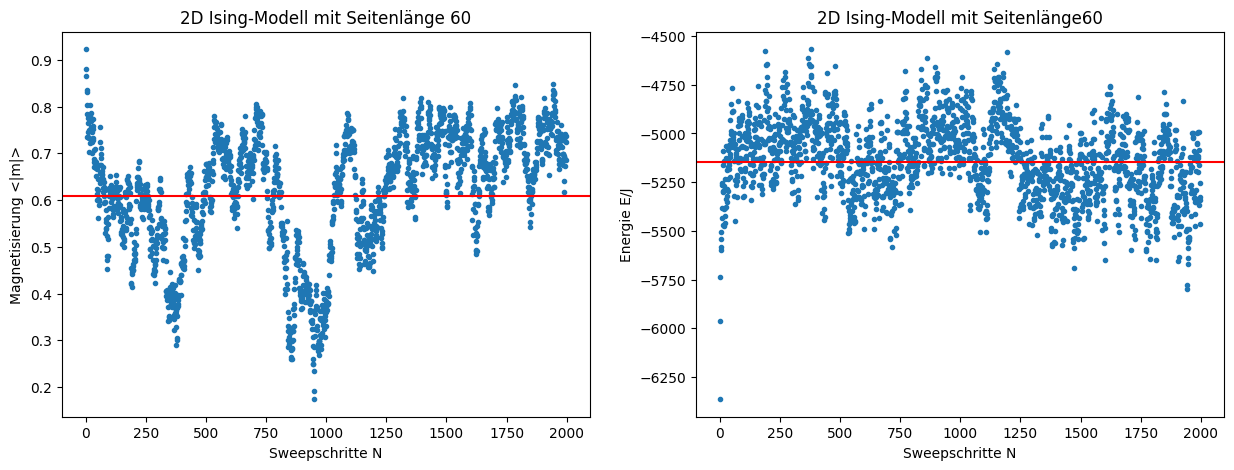

In [19]:
data = np.loadtxt("../data/criticalslowdown60.txt") # with initial phase, 10000 sweep 60x60
data2 = np.loadtxt("../data/criticalslowdown_energy60.txt") # with initial phase, 10000 sweep 60x60
fig ,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(data[1:2000],'.')
spin_mean = np.mean(data[5000:])
ax[0].axhline(spin_mean,c='r')
ax[0].set_xlabel("Sweepschritte N")
ax[0].set_ylabel(r"Magnetisierung <|m|>")
ax[0].set_title("2D Ising-Modell mit Seitenlänge 60")

ax[1].plot(data2[1:2000],'.')
spin_mean2 = np.mean(data2[5000:])
ax[1].axhline(spin_mean2,c='r')
ax[1].set_xlabel("Sweepschritte N")
ax[1].set_ylabel(r"Energie E/J")
ax[1].set_title("2D Ising-Modell mit Seitenlänge60")


plt.savefig("../Figure/criticalslowing2d")
plt.show()

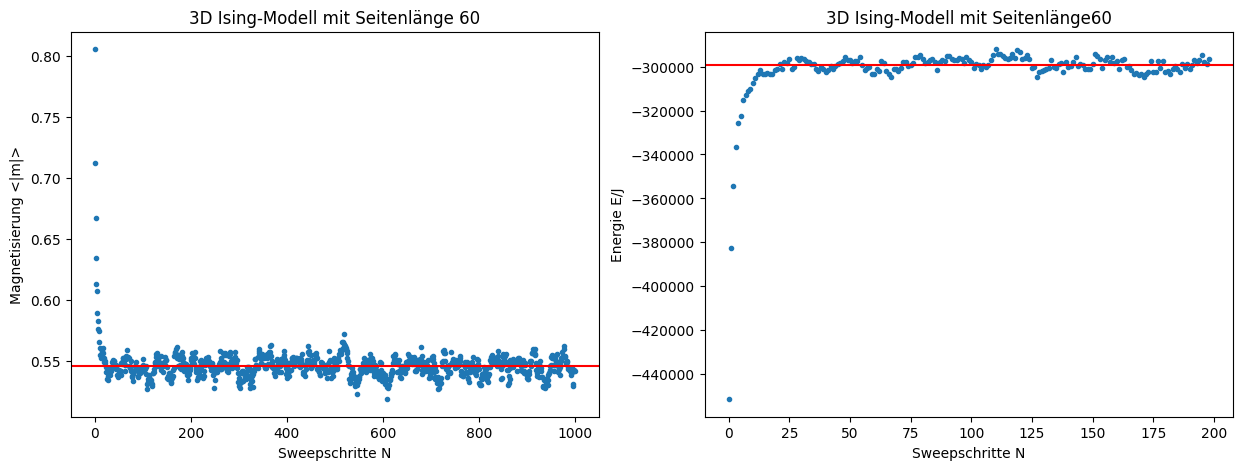

In [20]:
data = np.loadtxt("../data/criticalslowdown3D60.txt") # with initial phase, 1000 sweep  60x60x60
data2 = np.loadtxt("../data/criticalslowdown_energy3D60.txt") # with initial phase, 1000 sweep 60x60x60
fig ,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(data[1:],'.')
spin_mean = np.mean(data[200:])
ax[0].axhline(spin_mean,c='r')
ax[0].set_xlabel("Sweepschritte N")
ax[0].set_ylabel(r"Magnetisierung <|m|>")
ax[0].set_title("3D Ising-Modell mit Seitenlänge 60")

ax[1].plot(data2[1:200],'.')
spin_mean2 = np.mean(data2[200:])
ax[1].axhline(spin_mean2,c='r')
ax[1].set_xlabel("Sweepschritte N")
ax[1].set_ylabel(r"Energie E/J")
ax[1].set_title("3D Ising-Modell mit Seitenlänge60")


plt.savefig("../Figure/criticalslowing3d")
plt.show()

In [21]:
# Loading Data:
Spin_10 = np.loadtxt("../data/Spin_L10.txt").T
Spin_30 = np.loadtxt("../data/Spin_L30.txt").T
Spin_60 = np.loadtxt("../data/Spin_L60.txt").T
  

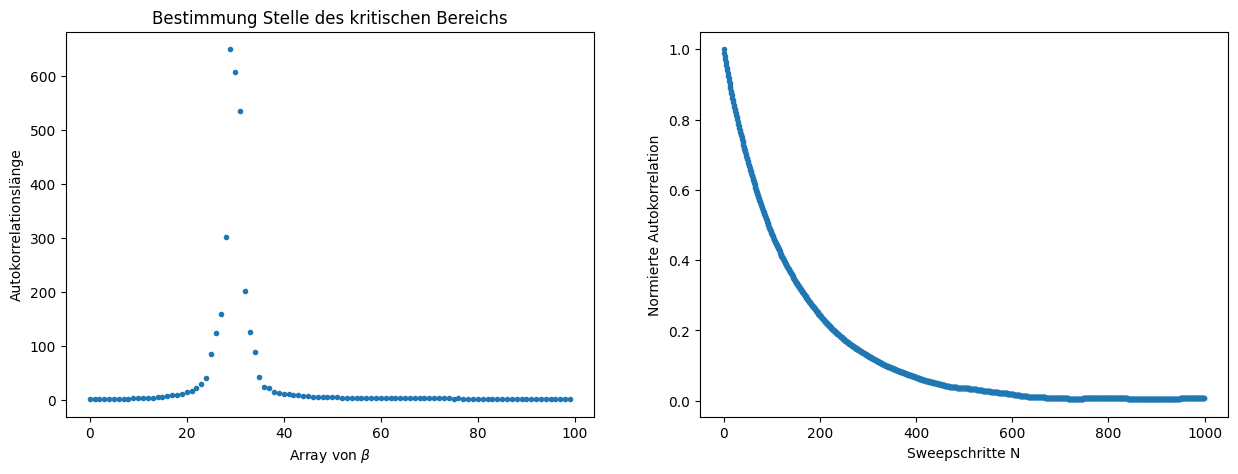

In [40]:
# Bestimmung der Blocklänge
temp_dim = Spin_60.shape[1]
arr = []
fig ,ax = plt.subplots(1,2, figsize=(15,5))
for i in range(temp_dim):
    auto = autocorr_array(Spin_60[1:,i],lag=1000)
    a = np.where(auto <0.01)[0]
    arr.append(a[0])
ax[0].plot(arr,'.')
ax[0].set_ylabel("Autokorrelationslänge")
ax[0].set_xlabel(r"Array von $\beta$")
ax[0].set_title(r"Bestimmung Stelle des kritischen Bereichs")
stelle = np.where(arr == max(arr))[0]
autocorrelation = autocorr_array(Spin_60[1:,stelle],lag=1000)
ax[1].plot(autocorrelation,'.')
ax[1].set_xlabel("Sweepschritte N")
ax[1].set_ylabel("Normierte Autokorrelation")
plt.savefig("../Figure/Autocorrelation2d")
plt.show()


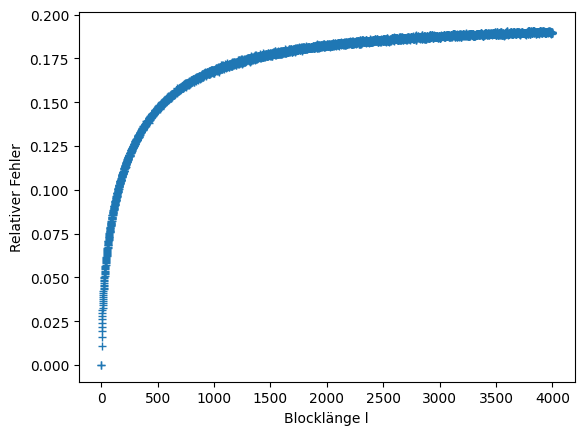

In [12]:
wo =29
x_1,y_1,y_err = data_blocking_error(Spin_60[1:,wo],4000)
plt.errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.xlabel(r"Blocklänge l")
plt.ylabel(r"Relativer Fehler")
plt.savefig("../Figure/Fehlerblocklänge")
plt.show()

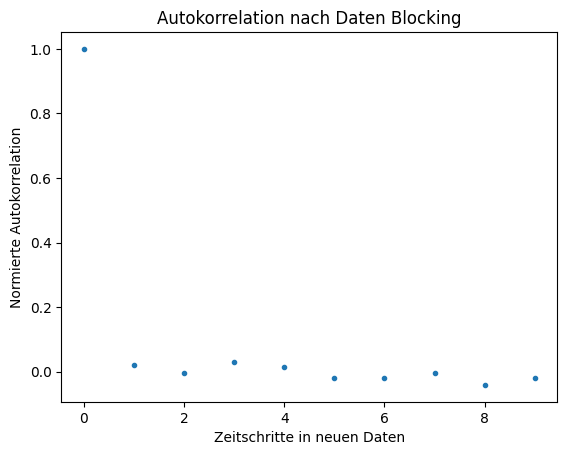

In [7]:
newdata = data_blocking(Spin_60[1:,29],1500)
plt.plot(autocorr_array(newdata,lag=10),'.')
plt.title("Autokorrelation nach Daten Blocking")
plt.ylabel(r"Normierte Autokorrelation")
plt.xlabel(r"Zeitschritte in neuen Daten")
plt.savefig("../Figure/neuevarAutocorrelation2d")
plt.show()

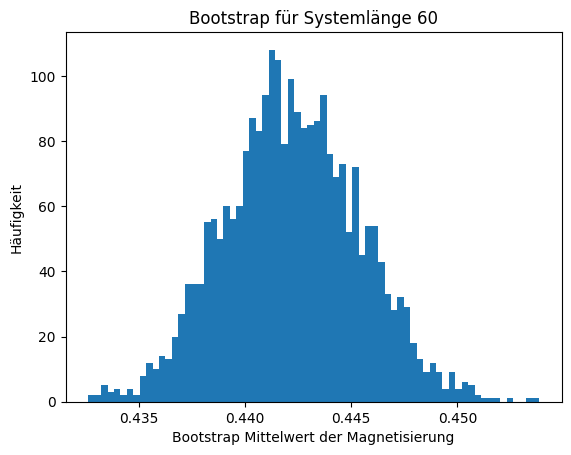

In [71]:
# Bootstrap Verhalten
Boot_length = 2500
Block_Length = 1500
wo = 29
bootstrap=data_blocking(Spin_60[1:,wo],Block_Length)
new_data2 = np.array([]) 
for _ in range(Boot_length): 
    new_data2 = np.append(new_data2,np.mean(bootstrap_data(bootstrap)))
plt.hist(new_data2,bins=70)
plt.xlabel("Bootstrap Mittelwert der Magnetisierung")
plt.ylabel("Häufigkeit")
plt.title("Bootstrap für Systemlänge 60")
plt.show()

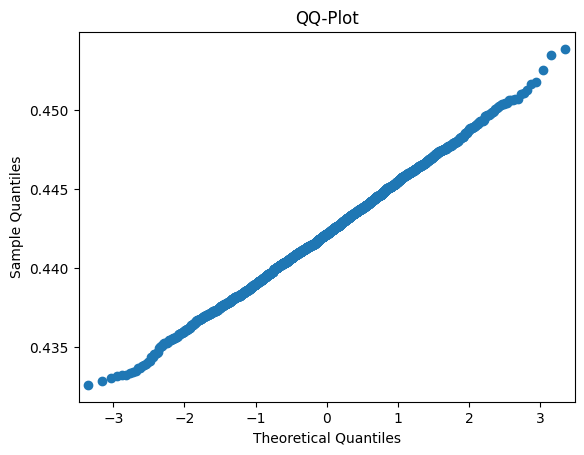

In [72]:
import statsmodels.api as sm 
import pylab as py

sm.qqplot(new_data2) 
plt.title("QQ-Plot")
plt.savefig("../Figure/QQ_Plot")
plt.show()

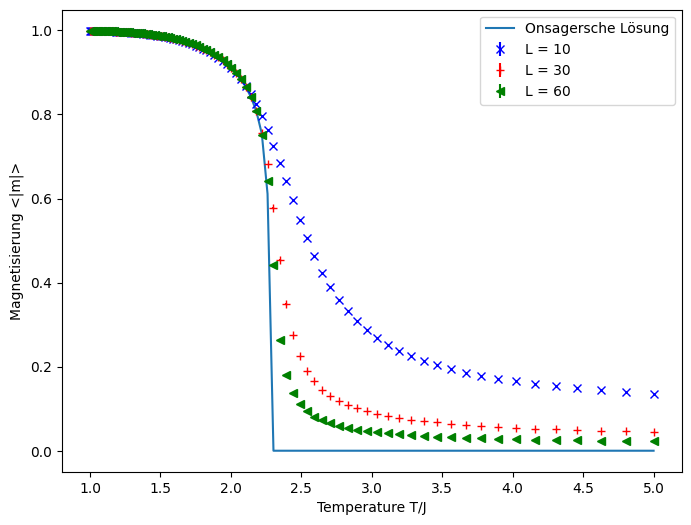

In [9]:
Boot_length = 2500
Block_Length = 1500
plt.figure(figsize=(8,6))
spin_simulation_plot(Spin_10, block_len=Block_Length, boot_length=Boot_length,color='b',format='x',label="L = 10") 
spin_simulation_plot(Spin_30, block_len=Block_Length, boot_length=Boot_length,color='r',format='+',label="L = 30") 
spin_simulation_plot(Spin_60, block_len=Block_Length, boot_length=Boot_length,color='g',format='<',label="L = 60") 
Beta = np.linspace(0.2,1,100)
x_achse = 1/Beta
y_achse = onsager_soluttion(Beta)
plt.plot(x_achse,y_achse,label=r'Onsagersche Lösung')
plt.xlabel(r"Temperature T/J")
plt.ylabel(r"Magnetisierung <|m|>")
plt.legend()
plt.savefig("../Figure/Magnetisierung2d")
plt.show()
        

<Figure size 800x600 with 0 Axes>

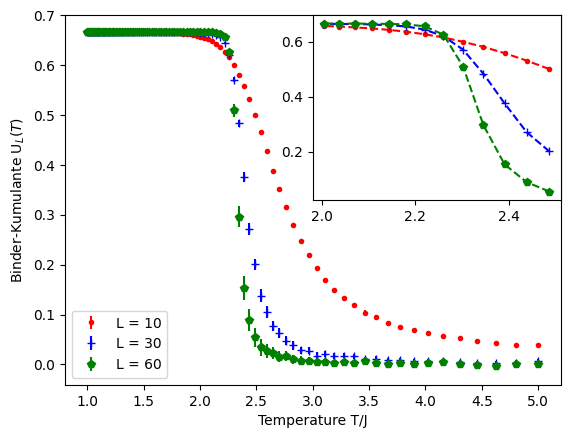

In [22]:
Boot_length = 2500
Block_Length = 1500
plt.figure(figsize=(8,6))
fig,ax = plt.subplots()
L_1,L_1_err = binder_cum_plot(Spin_10,block_len=Block_Length,boot_length=Boot_length,color='r',format='.',label="L = 10")
L_2,L_2_err = binder_cum_plot(Spin_30,block_len=Block_Length,boot_length=Boot_length,color='b',format='+',label="L = 30")
L_3,L_3_err = binder_cum_plot(Spin_60,block_len=Block_Length,boot_length=Boot_length,color='g',format='p',label="L = 60")
inaxis = ax.inset_axes([0.5,0.5,0.5,0.5])
temp = 1/Spin_10[0,:]
mask = (temp>=2) &(temp<=2.5)
inaxis.plot(temp[mask],L_1[mask],'.--',color='r')
inaxis.plot(temp[mask],L_2[mask],'+--',color='b')
inaxis.plot(temp[mask],L_3[mask],'p--',color='g')
ax.set_xlabel(r"Temperature T/J")
ax.set_ylabel(r"Binder-Kumulante U$_L(T)$")
plt.legend(loc='lower left')
plt.savefig("../Figure/Binderkummulanten2d")
plt.show()


In [8]:
# Load Data for Spin near critical region
# Loading Data:
Spin_nearTc_10 = np.loadtxt("../data/neartc2dneuspin10.txt").T
Spin_nearTc_20 = np.loadtxt("../data/neartc2dneuspin20.txt").T
Spin_nearTc_30 = np.loadtxt("../data/neartc2dneuspin30.txt").T
Spin_nearTc_40 = np.loadtxt("../data/neartc2dneuspin40.txt").T
Spin_nearTc_50 = np.loadtxt("../data/neartc2dneuspin50.txt").T
Spin_nearTc_60 = np.loadtxt("../data/neartc2dneuspin60.txt").T


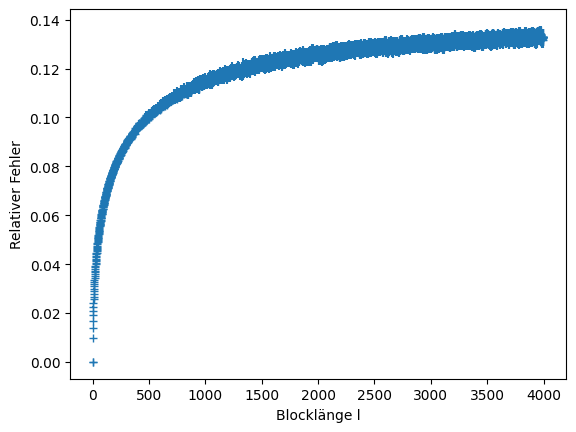

In [13]:
wo =5
x_1,y_1,y_err = data_blocking_error(Spin_nearTc_60[1:,wo],4000)
plt.errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.xlabel(r"Blocklänge l")
plt.ylabel(r"Relativer Fehler")
plt.savefig("../Figure/Fehlerblocklängeneartc2d")
plt.show()

In [16]:
# Kritische Temperatur
Boot_length = 2500
Block_Length = 1500
boot = 10
Spins = np.array([Spin_nearTc_10,Spin_nearTc_20,Spin_nearTc_30,Spin_nearTc_40,Spin_nearTc_50,Spin_nearTc_60])
critical_temp,critical_temp_err = critical_temp_error(Spins,2.26,2.275,Block_Length,Boot_length,boot)
print(f"Kritsche Temp = {critical_temp:.4e}, Fehler = {critical_temp_err:.4e}")

Kritsche Temp = 2.2677e+00, Fehler = 4.1965e-03


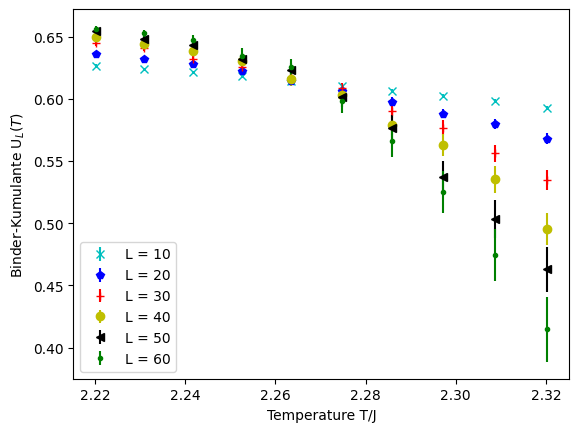

In [9]:
Boot_length = 2500
Block_Length = 1500
near_tcL_2D_1,near_tcL_2D_1_err = binder_cum_plot(Spin_nearTc_10, block_len=Block_Length, boot_length=Boot_length,color='c',format='x',label="L = 10") 
near_tcL_2D_2,near_tcL_2D_2_err = binder_cum_plot(Spin_nearTc_20, block_len=Block_Length, boot_length=Boot_length,color='b',format='p',label="L = 20") 
near_tcL_2D_3,near_tcL_2D_3_err = binder_cum_plot(Spin_nearTc_30, block_len=Block_Length, boot_length=Boot_length,color='r',format='+',label="L = 30") 
near_tcL_2D_4,near_tcL_2D_4_err = binder_cum_plot(Spin_nearTc_40, block_len=Block_Length, boot_length=Boot_length,color='y',format='o',label="L = 40") 
near_tcL_2D_5,near_tcL_2D_5_err = binder_cum_plot(Spin_nearTc_50, block_len=Block_Length, boot_length=Boot_length,color='black',format='<',label="L = 50") 
near_tcL_2D_6,near_tcL_2D_6_err = binder_cum_plot(Spin_nearTc_60, block_len=Block_Length, boot_length=Boot_length,color='g',format='.',label="L = 60") 
plt.xlabel(r"Temperature T/J")
plt.ylabel(r"Binder-Kumulante U$_L(T)$")
plt.legend(loc='lower left')
plt.savefig("../Figure/Binderkummulanten2dnearTC")
plt.show()


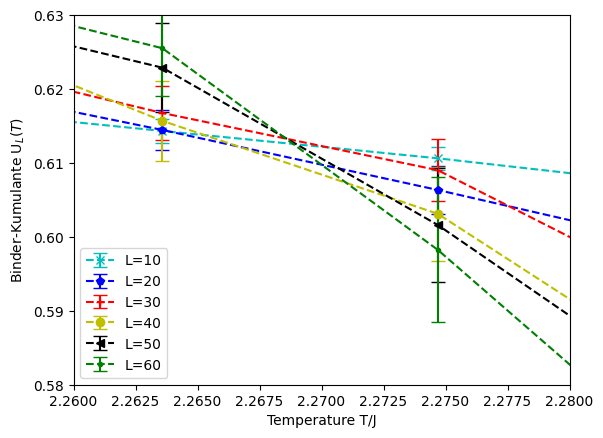

In [82]:
xdata = 1/Spin_nearTc_10[0,:]
plt.errorbar(xdata,near_tcL_2D_1,yerr=near_tcL_2D_1_err,capsize=5,fmt='x--' ,c= 'c',label='L=10')
plt.errorbar(xdata,near_tcL_2D_2,yerr=near_tcL_2D_2_err,capsize=5,fmt='p--' ,c= 'b',label='L=20')
plt.errorbar(xdata,near_tcL_2D_3,yerr=near_tcL_2D_3_err,capsize=5,fmt='+--' ,c= 'r',label='L=30')
plt.errorbar(xdata,near_tcL_2D_4,yerr=near_tcL_2D_4_err,capsize=5,fmt='o--' ,c= 'y',label='L=40')
plt.errorbar(xdata,near_tcL_2D_5,yerr=near_tcL_2D_5_err,capsize=5,fmt= '<--' ,c= 'black',label='L=50')
plt.errorbar(xdata,near_tcL_2D_6,yerr=near_tcL_2D_6_err,capsize=5,fmt= '.--' ,c= 'g',label='L=60')
plt.xlim(2.26,2.28)
plt.ylim(0.58,0.63)
plt.xlabel(r"Temperature T/J")
plt.ylabel(r"Binder-Kumulante U$_L(T)$")
plt.legend(loc='lower left')
plt.savefig("../Figure/Binderkummulanten2dnearzoomTC")
plt.show()

nu = 0.988, Delta_nu = 0.017


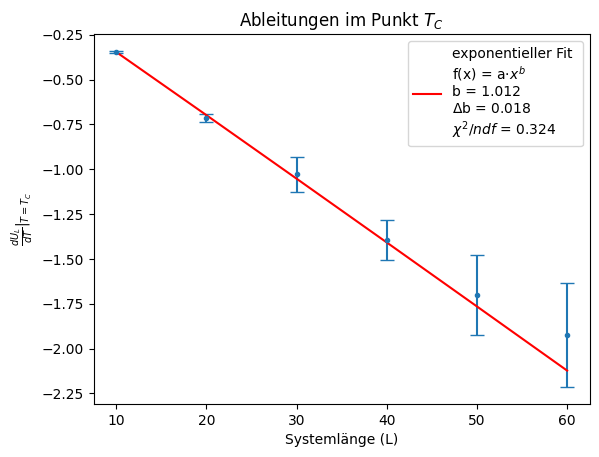

In [10]:
# Bestimmung von nu
x_data = 1/Spin_nearTc_10[0,:]
indx = (x_data>=2.24)&(x_data<=2.32)
new_x = x_data[indx]
new_L1,new_L1_err = near_tcL_2D_1[indx],near_tcL_2D_1_err[indx]
new_L2,new_L2_err = near_tcL_2D_2[indx],near_tcL_2D_2_err[indx]
new_L3,new_L3_err = near_tcL_2D_3[indx],near_tcL_2D_3_err[indx]
new_L4,new_L4_err = near_tcL_2D_4[indx],near_tcL_2D_4_err[indx]
new_L5,new_L5_err = near_tcL_2D_5[indx],near_tcL_2D_5_err[indx]
new_L6,new_L6_err = near_tcL_2D_6[indx],near_tcL_2D_6_err[indx]

du_dt_L1,delta_du_dt1 = dU_dT(new_L1,new_L1_err,new_x) 
du_dt_L2,delta_du_dt2 = dU_dT(new_L2,new_L2_err,new_x) 
du_dt_L3,delta_du_dt3 = dU_dT(new_L3,new_L3_err,new_x) 
du_dt_L4,delta_du_dt4 = dU_dT(new_L4,new_L4_err,new_x) 
du_dt_L5,delta_du_dt5 = dU_dT(new_L5,new_L5_err,new_x) 
du_dt_L6,delta_du_dt6 = dU_dT(new_L6,new_L6_err,new_x) 
system_length = np.linspace(10,60,6)

ableitung = np.array([du_dt_L1,du_dt_L2,du_dt_L3,du_dt_L4,du_dt_L5,du_dt_L6])
delta_ableitung = np.array([delta_du_dt1,delta_du_dt2,delta_du_dt3,delta_du_dt4,delta_du_dt5,delta_du_dt6])
plt.errorbar(system_length,ableitung,yerr=delta_ableitung,fmt='.',capsize=5)


popt,pcov = curve_fit(exponential_fit,system_length,ableitung,sigma=delta_ableitung)
chi = chi_sq(exponential_fit,system_length,ableitung,delta_ableitung,popt)
plt.plot(system_length,exponential_fit(system_length,*popt),'r',label=f'exponentieller Fit \nf(x) = a$\cdot x^b$ \nb = {popt[1]:.3f}\n$\Delta$b = {np.sqrt(pcov[1,1]):.3f}\n$\chi^2/ndf$ = {chi:.3f}')
nu = 1/popt[1]
delta_nu = np.sqrt((1/popt[1]**2*np.sqrt(pcov[1,1]))**2)
print(f'nu = {nu:.3f}, Delta_nu = {delta_nu:.3f}')
plt.xlabel('Systemlänge (L)')
plt.ylabel(r'$\frac{dU_L}{dT}|_{T=T_C}$')
plt.title(r'Ableitungen im Punkt $T_C$')
plt.legend()
plt.savefig("../Figure/AbleitungBinderkumm")
plt.show()

In [11]:
# Bestimmung von beta
Spin_nearTc_10 = np.loadtxt("../data/Spin_nearTC_2D_L10.txt").T
Spin_nearTc_20 = np.loadtxt("../data/Spin_nearTC_2D_L20.txt").T
Spin_nearTc_30 = np.loadtxt("../data/Spin_nearTC_2D_L30.txt").T
Spin_nearTc_40 = np.loadtxt("../data/Spin_nearTC_2D_L40.txt").T
Spin_nearTc_50 = np.loadtxt("../data/Spin_nearTC_2D_L50.txt").T
Spin_nearTc_60 = np.loadtxt("../data/Spin_nearTC_2D_L60.txt").T


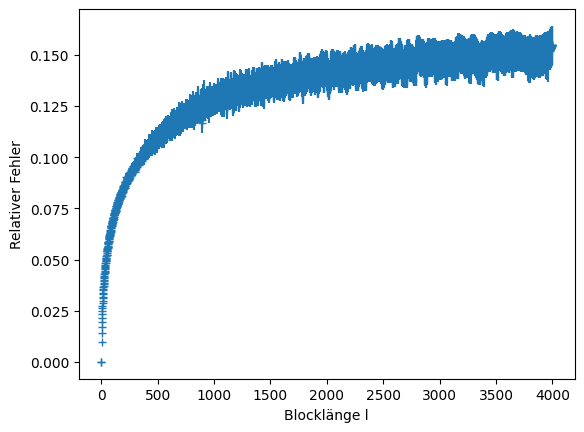

In [36]:
wo =2
x_1,y_1,y_err = data_blocking_error(Spin_nearTc_60[1:,wo],4000)
plt.errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.xlabel(r"Blocklänge l")
plt.ylabel(r"Relativer Fehler")
plt.savefig("../Figure/Fehlerblocklängeneartc2dbeta")
plt.show()

In [12]:
def Kritische_fehler(b,delta_b,nu,delta_nu):
    return np.sqrt((nu*delta_b)**2+(b*delta_nu)**2)

nu = -0.122, Delta_nu = 0.004


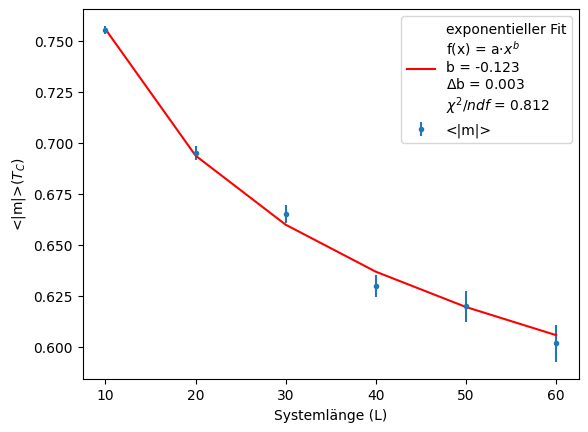

In [13]:
Boot_length = 2500
Block_Length = 800
x_data = 1/Spin_nearTc_10[0,:]
indx = (x_data>2.2681)&(x_data<=2.269)
new_x = x_data[indx]
length = 5
system_length = np.linspace(10,60,6)
Magnetization_L10,Magnetization_L10_err = bootstrap_mean_and_error(Spin_nearTc_10[1:,indx],Block_Length,boot_length=Boot_length)
Magnetization_L20,Magnetization_L20_err = bootstrap_mean_and_error(Spin_nearTc_20[1:,indx],Block_Length,boot_length=Boot_length)
Magnetization_L30,Magnetization_L30_err = bootstrap_mean_and_error(Spin_nearTc_30[1:,indx],Block_Length,boot_length=Boot_length)
Magnetization_L40,Magnetization_L40_err = bootstrap_mean_and_error(Spin_nearTc_40[1:,indx],Block_Length,boot_length=Boot_length)
Magnetization_L50,Magnetization_L50_err = bootstrap_mean_and_error(Spin_nearTc_50[1:,indx],Block_Length,boot_length=Boot_length)
Magnetization_L60,Magnetization_L60_err = bootstrap_mean_and_error(Spin_nearTc_60[1:,indx],Block_Length,boot_length=Boot_length)
Magnetization_TC = np.array([Magnetization_L10 ,Magnetization_L20 ,Magnetization_L30 ,Magnetization_L40 ,Magnetization_L50 ,Magnetization_L60])
Magnetization_TC_err = np.array([Magnetization_L10_err ,Magnetization_L20_err ,Magnetization_L30_err ,Magnetization_L40_err ,Magnetization_L50_err ,Magnetization_L60_err])
plt.errorbar(system_length,Magnetization_TC,yerr=Magnetization_TC_err,fmt='.',label='<|m|>')

popt,pcov = curve_fit(exponential_fit,system_length,Magnetization_TC,sigma=Magnetization_TC_err)
chi= chi_sq(exponential_fit,system_length,Magnetization_TC,Magnetization_TC_err,popt)
b = popt[1]
delta_b = np.sqrt(pcov[1,1])
beta = b*nu
delta_beta = Kritische_fehler(b,delta_b,nu,delta_nu)
print(f'nu = {beta:.3f}, Delta_nu = {delta_beta:.3f}')
plt.plot(system_length,exponential_fit(system_length,*popt),'r',label=f'exponentieller Fit\nf(x) = a$\cdot x^b$ \nb = {b:.3f}\n$\Delta$b = {delta_b:.3f} \n$\chi^2/ndf$ = {chi:.3f}')
plt.xlabel('Systemlänge (L)')
plt.ylabel(r'<|m|>($T_C$)')
plt.legend()
plt.savefig("../Figure/bestimmungvonbeta")
plt.show()

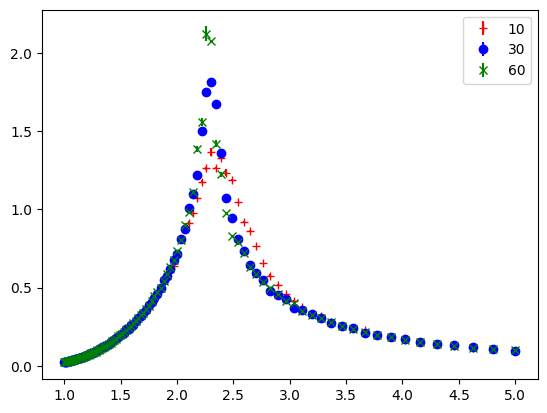

In [5]:
# Loading Data:
Energy_10 = np.loadtxt("../data/Energy_L10.txt").T
Energy_30 = np.loadtxt("../data/Energy_L30.txt").T
Energy_60 = np.loadtxt("../data/Energy_L60.txt").T
Boot_length = 2
Block_Length = 1500
specfic_heat_plot(Energy_10,block_len = Block_Length,color='r',format='+',boot_length=Boot_length,label='10',N=10**2)
specfic_heat_plot(Energy_30,block_len = Block_Length,color='b',format='o',boot_length=Boot_length,label='30',N=30**2)
specfic_heat_plot(Energy_60,block_len = Block_Length,color='g',format='x',boot_length=Boot_length,label='60',N=60**2)
plt.legend()
plt.show()

In [ ]:
### critical slowing down
Spin_nearTc_10 = np.loadtxt("../data/Spin_nearTC_2D_L10.txt").T
Spin_nearTc_20 = np.loadtxt("../data/Spin_nearTC_2D_L20.txt").T
Spin_nearTc_30 = np.loadtxt("../data/Spin_nearTC_2D_L30.txt").T
Spin_nearTc_40 = np.loadtxt("../data/Spin_nearTC_2D_L40.txt").T
Spin_nearTc_50 = np.loadtxt("../data/Spin_nearTC_2D_L50.txt").T
Spin_nearTc_60 = np.loadtxt("../data/Spin_nearTC_2D_L60.txt").T
Boot_length = 2
Block_Length = 2500
#near_tcL_3D_1,near_tcL_3D_1_err = binder_cum_plot(Spin_nearTc_10, block_len=Block_Length, boot_length=Boot_length,color='c',format='x',label="L = 10") 
#near_tcL_3D_2,near_tcL_3D_2_err = binder_cum_plot(Spin_nearTc_20, block_len=Block_Length, boot_length=Boot_length,color='b',format='p',label="L = 20") 
#near_tcL_3D_3,near_tcL_3D_3_err = binder_cum_plot(Spin_nearTc_30, block_len=Block_Length, boot_length=Boot_length,color='r',format='+',label="L = 30") 
#near_tcL_3D_4,near_tcL_3D_4_err = binder_cum_plot(Spin_nearTc_40, block_len=Block_Length, boot_length=Boot_length,color='y',format='o',label="L = 40") 
#near_tcL_3D_5,near_tcL_3D_5_err = binder_cum_plot(Spin_nearTc_50, block_len=Block_Length, boot_length=Boot_length,color='black',format='<',label="L = 50") 
#near_tcL_3D_6,near_tcL_3D_6_err = binder_cum_plot(Spin_nearTc_60, block_len=Block_Length, boot_length=Boot_length,color='g',format='.',label="L = 60") 
#plt.legend()
#plt.show()

[2.26869004]


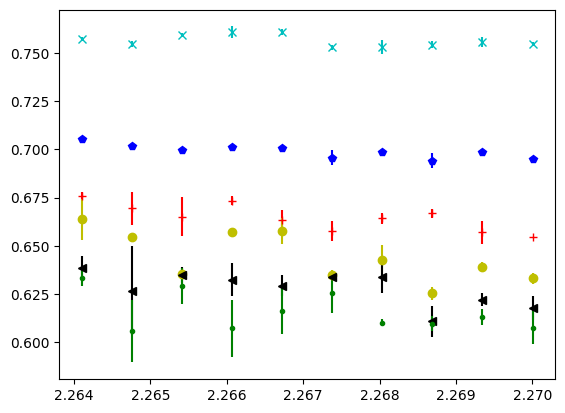

In [8]:
spin_simulation_plot(Spin_nearTc_10, block_len=Block_Length, boot_length=Boot_length,color='c',format='x',label="L = 10") 
spin_simulation_plot(Spin_nearTc_20, block_len=Block_Length, boot_length=Boot_length,color='b',format='p',label="L = 20") 
spin_simulation_plot(Spin_nearTc_30, block_len=Block_Length, boot_length=Boot_length,color='r',format='+',label="L = 30") 
spin_simulation_plot(Spin_nearTc_40, block_len=Block_Length, boot_length=Boot_length,color='y',format='o',label="L = 40") 
spin_simulation_plot(Spin_nearTc_50, block_len=Block_Length, boot_length=Boot_length,color='black',format='<',label="L = 50")
spin_simulation_plot(Spin_nearTc_60, block_len=Block_Length, boot_length=Boot_length,color='g',format='.',label="L = 60") 
x_data = 1/Spin_nearTc_10[0,:]
indx = (x_data>2.2681)&(x_data<=2.269)
new_x = x_data[indx]
print(new_x)

In [107]:
suszep_nearTc_10 = np.loadtxt("../data/suszep2d10.txt").T
suszep_nearTc_20 = np.loadtxt("../data/suszep2d20.txt").T
suszep_nearTc_30 = np.loadtxt("../data/suszep2d30.txt").T
suszep_nearTc_40 = np.loadtxt("../data/suszep2d40.txt").T
suszep_nearTc_50 = np.loadtxt("../data/suszep2d50.txt").T
suszep_nearTc_60 = np.loadtxt("../data/suszep2d60.txt").T

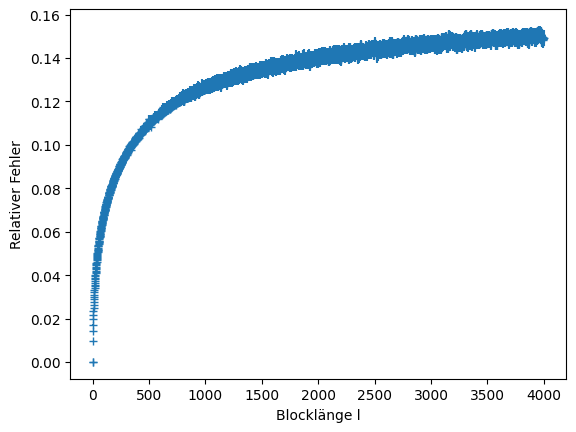

In [48]:
wo =2
x_1,y_1,y_err = data_blocking_error(suszep_nearTc_60[1:,wo]/60**2,4000)
plt.errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.xlabel(r"Blocklänge l")
plt.ylabel(r"Relativer Fehler")
plt.savefig("../Figure/Fehlerblocklängeneartc2dgamma")
plt.show()

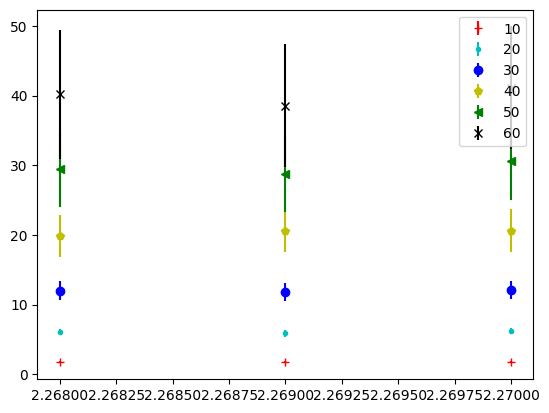

In [108]:
Boot_length = 2500
Block_Length = 1000
L1,L1_err =magnetic_sus_plot(suszep_nearTc_10,block_len = Block_Length,color='r',format='+',boot_length=Boot_length,label='10',N=10**2)
L2,L2_err =magnetic_sus_plot(suszep_nearTc_20,block_len = Block_Length,color='c',format='.',boot_length=Boot_length,label='20',N=20**2)
L3,L3_err =magnetic_sus_plot(suszep_nearTc_30,block_len = Block_Length,color='b',format='o',boot_length=Boot_length,label='30',N=30**2)
L4,L4_err =magnetic_sus_plot(suszep_nearTc_40,block_len = Block_Length,color='y',format='p',boot_length=Boot_length,label='40',N=40**2)
L5,L5_err =magnetic_sus_plot(suszep_nearTc_50,block_len = Block_Length,color='g',format='<',boot_length=Boot_length,label='50',N=50**2)
L6,L6_err =magnetic_sus_plot(suszep_nearTc_60,block_len = Block_Length,color='black',format='x',boot_length=Boot_length,label='60',N=60**2)
plt.legend()
plt.show()

nu = 1.722, Delta_nu = 0.028


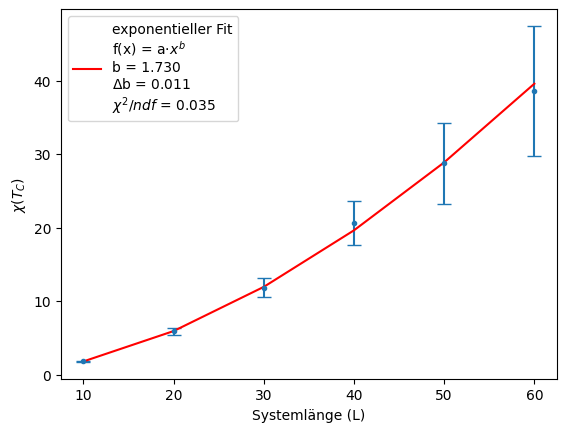

In [109]:
temp_array = np.array([L1[1],L2[1],L3[1],L4[1],L5[1],L6[1]])
temp_err =np.array([L1_err[1],L2_err[1],L3_err[1],L4_err[1],L5_err[1],L6_err[1]])
system_length = np.linspace(10,60,6)

plt.errorbar(system_length,temp_array,yerr=temp_err,fmt='.',capsize=5)


popt,pcov = curve_fit(exponential_fit,system_length,temp_array,sigma=temp_err)
chi= chi_sq(exponential_fit,system_length,temp_array,temp_err,popt)
b = popt[1]
delta_b = np.sqrt(pcov[1,1])
beta = b*nu
delta_beta = Kritische_fehler(b,delta_b,nu,delta_nu)
print(f'nu = {beta:.3f}, Delta_nu = {delta_beta:.3f}')

plt.plot(system_length,exponential_fit(system_length,*popt),'r',label=f'exponentieller Fit\nf(x) = a$\cdot x^b$ \nb = {b:.3f}\n$\Delta$b = {delta_b:.3f} \n$\chi^2/ndf$ = {chi:.3f}')
plt.xlabel('Systemlänge (L)')
plt.ylabel(r'$\chi$($T_C$)')
plt.legend()
plt.savefig("../Figure/bestimmungvongamma2d")
plt.show()

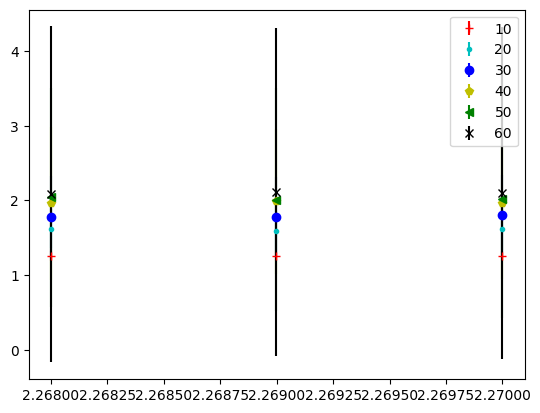

In [110]:
specfic_10 = np.loadtxt("../data/specific2d10.txt").T
specfic_20 = np.loadtxt("../data/specific2d20.txt").T
specfic_30 = np.loadtxt("../data/specific2d30.txt").T
specfic_40 = np.loadtxt("../data/specific2d40.txt").T
specfic_50 = np.loadtxt("../data/specific2d50.txt").T
specfic_60 = np.loadtxt("../data/specific2d60.txt").T

Boot_length = 2500
Block_Length = 1500
L1,L1_err = specfic_heat_plot(specfic_10,block_len = Block_Length,color='r',format='+',boot_length=Boot_length,label='10',N=10**2)
L2,L2_err = specfic_heat_plot(specfic_20,block_len = Block_Length,color='c',format='.',boot_length=Boot_length,label='20',N=20**2)
L3,L3_err = specfic_heat_plot(specfic_30,block_len = Block_Length,color='b',format='o',boot_length=Boot_length,label='30',N=30**2)
L4,L4_err = specfic_heat_plot(specfic_40,block_len = Block_Length,color='y',format='p',boot_length=Boot_length,label='40',N=40**2)
L5,L5_err = specfic_heat_plot(specfic_50,block_len = Block_Length,color='g',format='<',boot_length=Boot_length,label='50',N=50**2)
L6,L6_err = specfic_heat_plot(specfic_60,block_len = Block_Length,color='black',format='x',boot_length=Boot_length,label='60',N=60**2)
plt.legend()
plt.show()



nu = 0.319, Delta_nu = 0.009


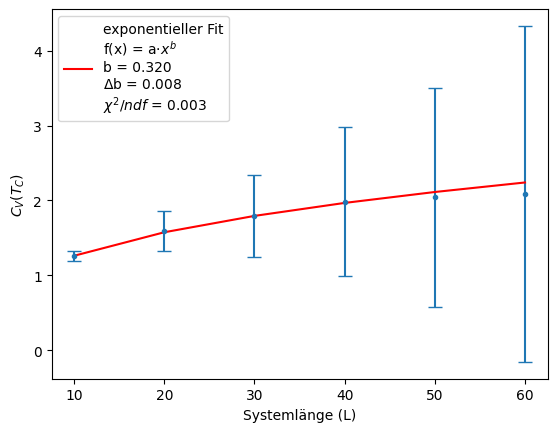

In [106]:
temp_array = np.array([L1[1],L2[1],L3[1],L4[1],L5[1],L6[1]])
temp_err =np.array([L1_err[1],L2_err[1],L3_err[1],L4_err[1],L5_err[1],L6_err[1]])
system_length = np.linspace(10,60,6)

plt.errorbar(system_length,temp_array,yerr=temp_err,fmt='.',capsize=5)


popt,pcov = curve_fit(exponential_fit,system_length,temp_array,sigma=temp_err)
chi= chi_sq(exponential_fit,system_length,temp_array,temp_err,popt)
b = popt[1]
delta_b = np.sqrt(pcov[1,1])
beta = b*nu
delta_beta = Kritische_fehler(b,delta_b,nu,delta_nu)
print(f'nu = {beta:.3f}, Delta_nu = {delta_beta:.3f}')

plt.plot(system_length,exponential_fit(system_length,*popt),'r',label=f'exponentieller Fit\nf(x) = a$\cdot x^b$ \nb = {b:.3f}\n$\Delta$b = {delta_b:.3f} \n$\chi^2/ndf$ = {chi:.3f}')
plt.xlabel('Systemlänge (L)')
plt.ylabel(r'$C_V$($T_C$)')
plt.legend()
plt.savefig("../Figure/bestimmungvonalpha2d")
plt.show()

nu = 0.026, Delta_nu = 0.003


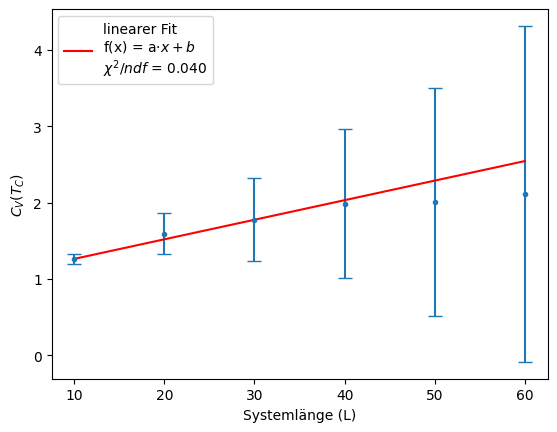

In [112]:
temp_array = np.array([L1[1],L2[1],L3[1],L4[1],L5[1],L6[1]])
temp_err =np.array([L1_err[1],L2_err[1],L3_err[1],L4_err[1],L5_err[1],L6_err[1]])
system_length = np.linspace(10,60,6)

plt.errorbar(system_length,temp_array,yerr=temp_err,fmt='.',capsize=5)


popt,pcov = curve_fit(linear_fit,system_length,temp_array,sigma=temp_err)
chi= chi_sq(linear_fit,system_length,temp_array,temp_err,popt)
b = popt[0]
delta_b = np.sqrt(pcov[0,0])
beta = b*nu
delta_beta = Kritische_fehler(b,delta_b,nu,delta_nu)
print(f'nu = {beta:.3f}, Delta_nu = {delta_beta:.3f}')

plt.plot(system_length,linear_fit(system_length,*popt),'r',label=f'linearer Fit\nf(x) = a$\cdot x+b$ \n$\chi^2/ndf$ = {chi:.3f}')
plt.xlabel('Systemlänge (L)')
plt.ylabel(r'$C_V$($T_C$)')
plt.legend()
plt.savefig("../Figure/bestimmungvonalpha2dlinear")
plt.show()

#     Von hier Weiter  3D

In [25]:
# Load 3D Data
Spin_3D_10 = np.loadtxt("../data/Spin_3D_L10.txt").T
Spin_3D_20 = np.loadtxt("../data/Spin_3D_L20.txt").T
Spin_3D_30 = np.loadtxt("../data/Spin_3D_L30.txt").T
Spin_3D_40 = np.loadtxt("../data/Spin_3D_L40.txt").T
Spin_3D_60 = np.loadtxt("../data/Spin_3D_L60.txt").T

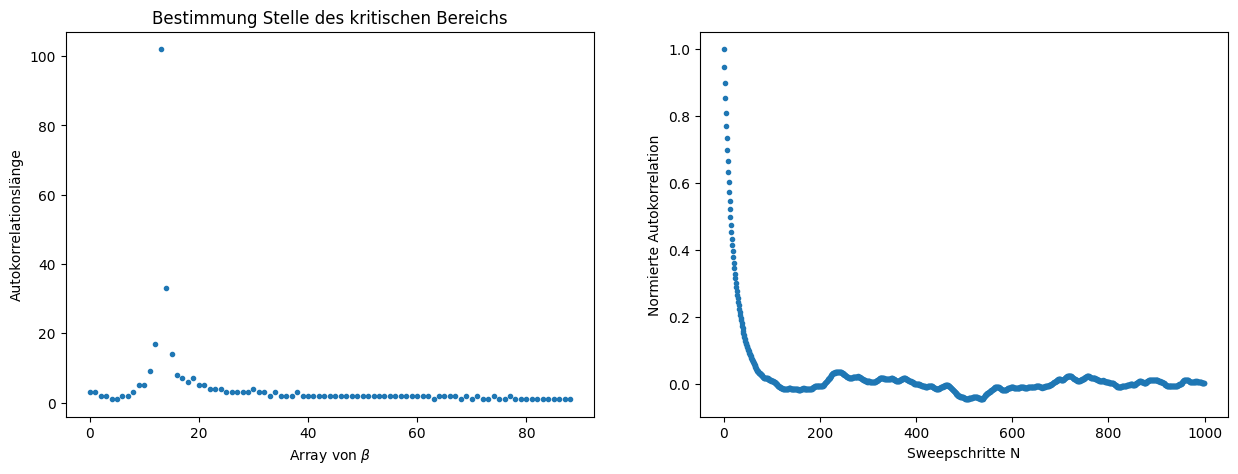

In [9]:
# Bestimmung der Blocklänge für 3D
temp_dim = Spin_3D_60.shape[1]
arr = []
fig ,ax = plt.subplots(1,2, figsize=(15,5))
for i in range(temp_dim):
    auto = autocorr_array(Spin_3D_60[1:,i],lag=1000)
    a = np.where(auto <0.01)[0]
    arr.append(a[0])
ax[0].plot(arr,'.')
ax[0].set_ylabel("Autokorrelationslänge")
ax[0].set_xlabel(r"Array von $\beta$")
ax[0].set_title(r"Bestimmung Stelle des kritischen Bereichs")
stelle = np.where(arr == max(arr))[0]
autocorrelation = autocorr_array(Spin_3D_60[1:,stelle],lag=1000)
ax[1].plot(autocorrelation,'.')
ax[1].set_xlabel("Sweepschritte N")
ax[1].set_ylabel("Normierte Autokorrelation")
plt.savefig("../Figure/Autocorrelation3d")
plt.show()

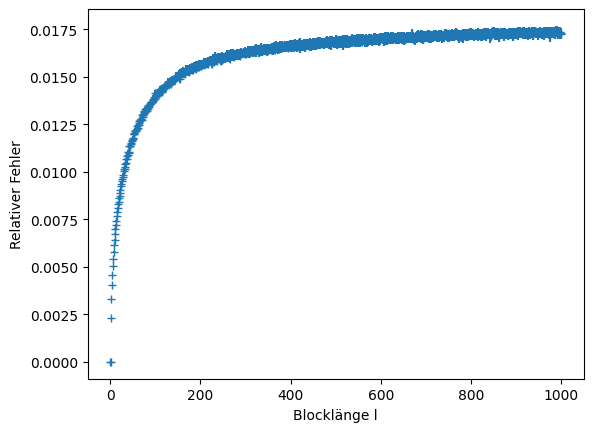

In [16]:
wo =13
x_1,y_1,y_err = data_blocking_error(Spin_3D_60[1:,wo],1000)
plt.errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.xlabel(r"Blocklänge l")
plt.ylabel(r"Relativer Fehler")
plt.savefig("../Figure/Fehlerblocklänge3d")
plt.show()

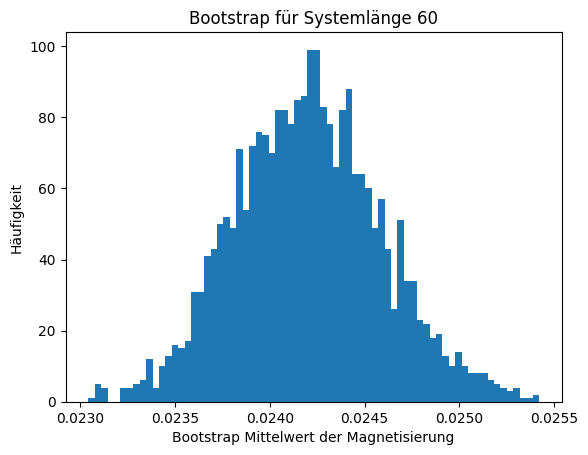

In [40]:
# Bootstrap Verhalten
Boot_length = 2500
Block_Length = 300
wo = 13
bootstrap=data_blocking(Spin_3D_60[1:,wo],Block_Length)
new_data2 = np.array([]) 
for _ in range(Boot_length): 
    new_data2 = np.append(new_data2,np.mean(bootstrap_data(bootstrap)))
plt.hist(new_data2,bins=70)
plt.xlabel("Bootstrap Mittelwert der Magnetisierung")
plt.ylabel("Häufigkeit")
plt.title("Bootstrap für Systemlänge 60")
plt.savefig("../Figure/Histogramm3d")
plt.show()

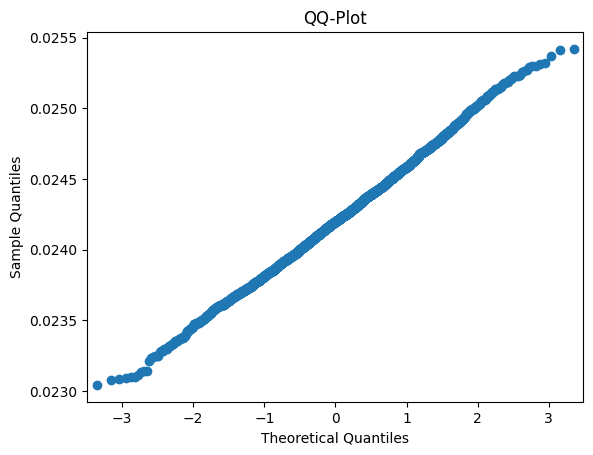

In [41]:
import statsmodels.api as sm 
import pylab as py

sm.qqplot(new_data2) 
plt.title("QQ-Plot")
plt.savefig("../Figure/QQ_Plot3d")
plt.show()

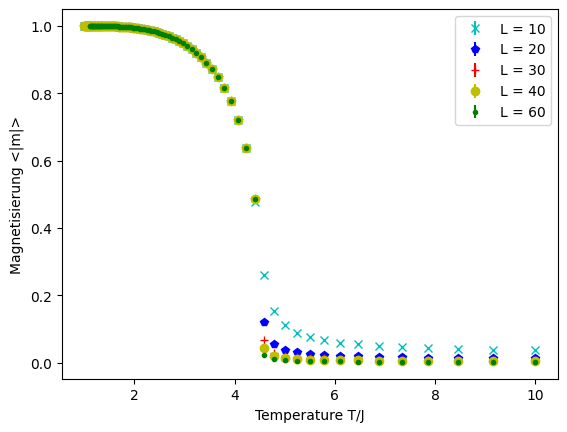

In [42]:
Boot_length = 2500
Block_Length = 300
spin_simulation_plot(Spin_3D_10, block_len=Block_Length, boot_length=Boot_length,color='c',format='x',label="L = 10") 
spin_simulation_plot(Spin_3D_20, block_len=Block_Length, boot_length=Boot_length,color='b',format='p',label="L = 20") 
spin_simulation_plot(Spin_3D_30, block_len=Block_Length, boot_length=Boot_length,color='r',format='+',label="L = 30") 
spin_simulation_plot(Spin_3D_40, block_len=Block_Length, boot_length=Boot_length,color='y',format='o',label="L = 40") 
spin_simulation_plot(Spin_3D_60, block_len=Block_Length, boot_length=Boot_length,color='g',format='.',label="L = 60") 

plt.xlabel(r"Temperature T/J")
plt.ylabel(r"Magnetisierung <|m|>")
plt.legend()
plt.savefig("../Figure/Magnetisierung3d")
plt.show()

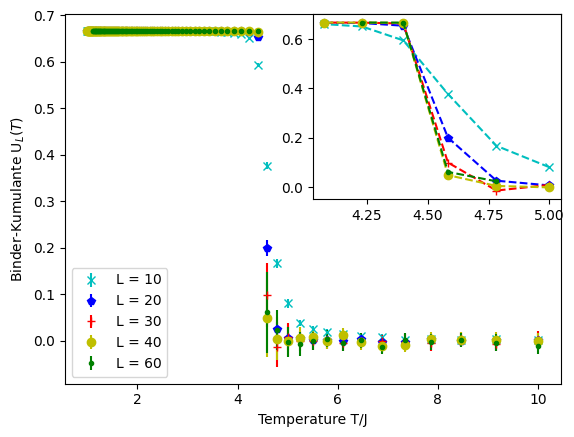

In [48]:
Boot_length = 2500
Block_Length = 400
fig,ax = plt.subplots()
L_3D_1,L_3D_1_err = binder_cum_plot(Spin_3D_10, block_len=Block_Length, boot_length=Boot_length,color='c',format='x',label="L = 10") 
L_3D_2,L_3D_2_err = binder_cum_plot(Spin_3D_20, block_len=Block_Length, boot_length=Boot_length,color='b',format='p',label="L = 20") 
L_3D_3,L_3D_3_err = binder_cum_plot(Spin_3D_30, block_len=Block_Length, boot_length=Boot_length,color='r',format='+',label="L = 30") 
L_3D_4,L_3D_4_err = binder_cum_plot(Spin_3D_40, block_len=Block_Length, boot_length=Boot_length,color='y',format='o',label="L = 40") 
L_3D_5,L_3D_5_err = binder_cum_plot(Spin_3D_60, block_len=Block_Length, boot_length=Boot_length,color='g',format='.',label="L = 60") 

inaxis = ax.inset_axes([0.5,0.5,0.5,0.5])
temp = 1/Spin_3D_10[0,:]
mask = (temp>=4) &(temp<=5)
temp2 = 1/Spin_3D_60[0,:]
mask2 = (temp2>=4.2) &(temp2<=4.8)
inaxis.plot(temp[mask],L_3D_1[mask],'x--',color='c')
inaxis.plot(temp[mask],L_3D_2[mask],'p--',color='b')
inaxis.plot(temp[mask],L_3D_3[mask],'+--',color='r')
inaxis.plot(temp[mask],L_3D_4[mask],'o--',color='y')
inaxis.plot(temp2[mask2],L_3D_5[mask2],'.--',color='g')
ax.set_xlabel(r"Temperature T/J")
ax.set_ylabel(r"Binder-Kumulante U$_L(T)$")
plt.legend(loc='lower left')
plt.savefig("../Figure/Binderkummulanten3d")
plt.show()

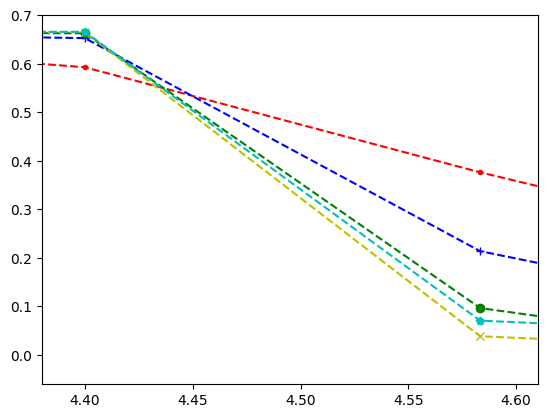

In [109]:
x_data = 1/Spin_3D_10[0,:]
x_data2 = 1/Spin_3D_60[0,:]
plt.plot(x_data,L_3D_1,'.--',c='r')
plt.plot(x_data,L_3D_2,'+--',c='b')
plt.plot(x_data,L_3D_3,'o--',c='g')
plt.plot(x_data,L_3D_4,'x--',c='y')
plt.plot(x_data2,L_3D_5,'p--',c='c')
plt.xlim(4.38,4.61)
#plt.ylim(0.5,0.66)
plt.show()


In [2]:
spin_3d_10 = np.loadtxt("../data/neartc3dneuspin10.txt").T
spin_3d_20 = np.loadtxt("../data/neartc3dneuspin20.txt").T
spin_3d_30 = np.loadtxt("../data/neartc3dneuspin30.txt").T
spin_3d_40 = np.loadtxt("../data/neartc3dneuspin40.txt").T
spin_3d_50 = np.loadtxt("../data/neartc3dneuspin50.txt").T
spin_3d_60 = np.loadtxt("../data/neartc3dneuspin60.txt").T

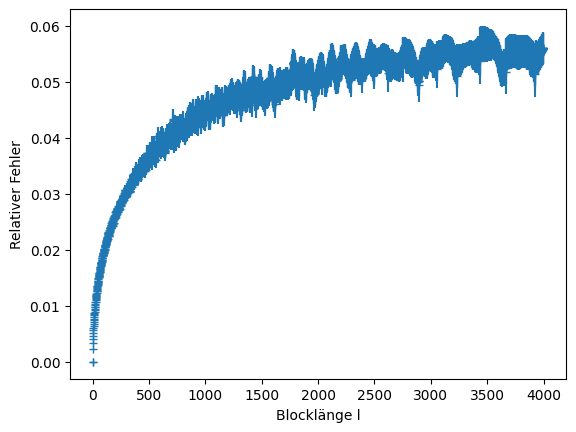

In [6]:
wo =5
x_1,y_1,y_err = data_blocking_error(spin_3d_60[1:,wo],4000)
plt.errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.xlabel(r"Blocklänge l")
plt.ylabel(r"Relativer Fehler")
plt.savefig("../Figure/Fehlerblocklängeneartc3d")
plt.show()

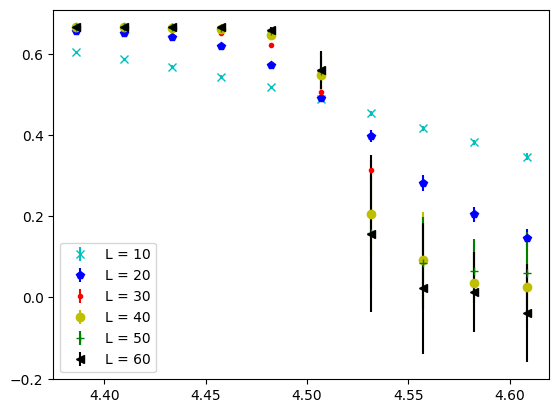

In [15]:
Boot_length = 100
Block_Length = 800
L_3D_1,L_3D_1_err = binder_cum_plot(spin_3d_10, block_len=Block_Length, boot_length=Boot_length,color='c',format='x',label="L = 10") 
L_3D_2,L_3D_2_err = binder_cum_plot(spin_3d_20, block_len=Block_Length, boot_length=Boot_length,color='b',format='p',label="L = 20") 
L_3D_3,L_3D_3_err = binder_cum_plot(spin_3d_30, block_len=Block_Length, boot_length=Boot_length,color='r',format='.',label="L = 30") 
L_3D_4,L_3D_4_err = binder_cum_plot(spin_3d_40, block_len=Block_Length, boot_length=Boot_length,color='y',format='o',label="L = 40") 
L_3D_5,L_3D_5_err = binder_cum_plot(spin_3d_50, block_len=Block_Length, boot_length=Boot_length,color='g',format='+',label="L = 50") 
L_3D_6,L_3D_6_err = binder_cum_plot(spin_3d_60, block_len=Block_Length, boot_length=Boot_length,color='black',format='<',label="L = 60") 
plt.legend()
plt.show()

In [4]:
spin_3d_10 = np.loadtxt("../data/spin_3dnochgenau10.txt").T
spin_3d_20 = np.loadtxt("../data/spin_3dnochgenau20.txt").T
spin_3d_30 = np.loadtxt("../data/spin_3dnochgenau30.txt").T
spin_3d_40 = np.loadtxt("../data/spin_3dnochgenau40.txt").T
spin_3d_50 = np.loadtxt("../data/spin_3dnochgenau50.txt").T
spin_3d_60 = np.loadtxt("../data/spin_3dnochgenau60.txt").T

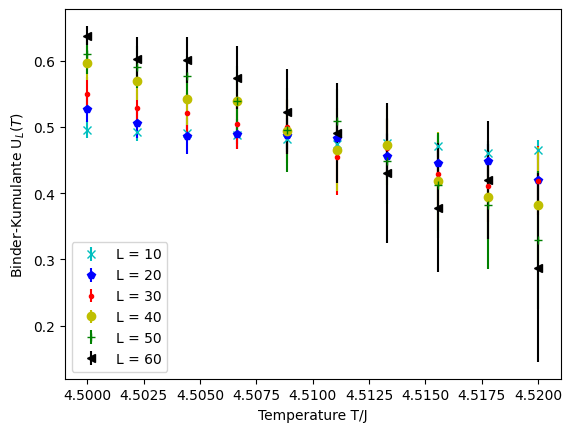

In [5]:
Boot_length = 2500
Block_Length = 1500
L_3D_1,L_3D_1_err = binder_cum_plot(spin_3d_10, block_len=Block_Length, boot_length=Boot_length,color='c',format='x',label="L = 10") 
L_3D_2,L_3D_2_err = binder_cum_plot(spin_3d_20, block_len=Block_Length, boot_length=Boot_length,color='b',format='p',label="L = 20") 
L_3D_3,L_3D_3_err = binder_cum_plot(spin_3d_30, block_len=Block_Length, boot_length=Boot_length,color='r',format='.',label="L = 30") 
L_3D_4,L_3D_4_err = binder_cum_plot(spin_3d_40, block_len=Block_Length, boot_length=Boot_length,color='y',format='o',label="L = 40") 
L_3D_5,L_3D_5_err = binder_cum_plot(spin_3d_50, block_len=Block_Length, boot_length=Boot_length,color='g',format='+',label="L = 50") 
L_3D_6,L_3D_6_err = binder_cum_plot(spin_3d_60, block_len=Block_Length, boot_length=Boot_length,color='black',format='<',label="L = 60") 
plt.xlabel(r"Temperature T/J")
plt.ylabel(r"Binder-Kumulante U$_L(T)$")
plt.legend(loc='lower left')
plt.savefig("../Figure/Binderkummulanten3dnearTC")
plt.show()

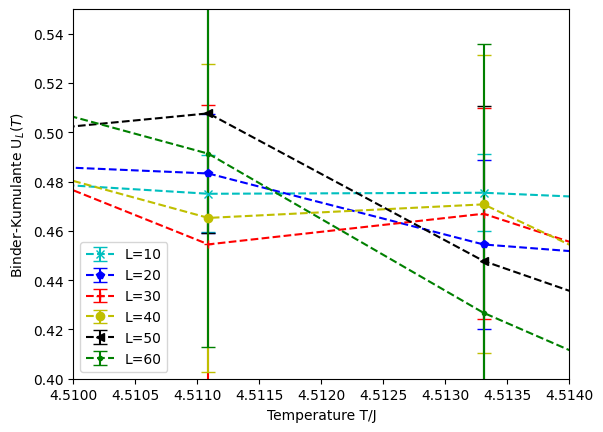

In [102]:
xdata = 1/spin_3d_60[0,:]
plt.errorbar(xdata,L_3D_1,yerr=L_3D_1_err,capsize=5,fmt='x--' ,c= 'c',label='L=10')
plt.errorbar(xdata,L_3D_2,yerr=L_3D_2_err,capsize=5,fmt='p--' ,c= 'b',label='L=20')
plt.errorbar(xdata,L_3D_3,yerr=L_3D_3_err,capsize=5,fmt='+--' ,c= 'r',label='L=30')
plt.errorbar(xdata,L_3D_4,yerr=L_3D_4_err,capsize=5,fmt='o--' ,c= 'y',label='L=40')
plt.errorbar(xdata,L_3D_5,yerr=L_3D_5_err,capsize=5,fmt= '<--' ,c= 'black',label='L=50')
plt.errorbar(xdata,L_3D_6,yerr=L_3D_6_err,capsize=5,fmt= '.--' ,c= 'g',label='L=60')
plt.xlim(4.510,4.514)
plt.ylim(0.4,0.55)
plt.xlabel(r"Temperature T/J")
plt.ylabel(r"Binder-Kumulante U$_L(T)$")
plt.legend(loc='lower left')
plt.savefig("../Figure/Binderkummulanten3dnearzoomTC")
plt.show()

nu = 0.757, Delta_nu = 0.061


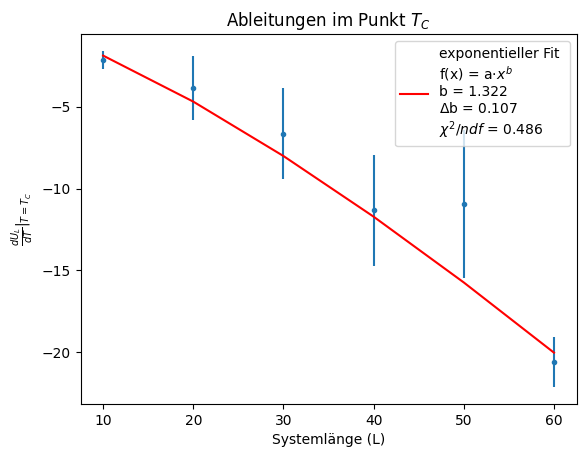

In [7]:
x_data = 1/spin_3d_60[0,:]
indx = (x_data>=4.505)&(x_data<=4.5150)
new_x = x_data[indx]
new_L1,new_L1_err = L_3D_1[indx],L_3D_1_err[indx]
new_L2,new_L2_err = L_3D_2[indx],L_3D_2_err[indx]
new_L3,new_L3_err = L_3D_3[indx],L_3D_3_err[indx]
new_L4,new_L4_err = L_3D_4[indx],L_3D_4_err[indx]
new_L5,new_L5_err = L_3D_5[indx],L_3D_5_err[indx]
new_L6,new_L6_err = L_3D_6[indx],L_3D_6_err[indx]

du_dt_L1,delta_du_dt1 = dU_dT(new_L1,new_L1_err,new_x) 
du_dt_L2,delta_du_dt2 = dU_dT(new_L2,new_L2_err,new_x) 
du_dt_L3,delta_du_dt3 = dU_dT(new_L3,new_L3_err,new_x)
du_dt_L4,delta_du_dt4 = dU_dT(new_L4,new_L4_err,new_x) 
du_dt_L5,delta_du_dt5 = dU_dT(new_L5,new_L5_err,new_x) 
du_dt_L6,delta_du_dt6 = dU_dT(new_L6,new_L6_err,new_x) 

system_length = np.linspace(10,60,6)
ableitung = np.array([du_dt_L1,du_dt_L2,du_dt_L3,du_dt_L4,du_dt_L5,du_dt_L6])
delta_ableitung = np.array([delta_du_dt1,delta_du_dt2,delta_du_dt3,delta_du_dt4,delta_du_dt5,delta_du_dt6])
plt.errorbar(system_length,ableitung,yerr=delta_ableitung,fmt='.')
popt,pcov = curve_fit(exponential_fit,system_length,ableitung,sigma=delta_ableitung)
nu = 1/popt[1]
delta_nu = np.sqrt((1/popt[1]**2*np.sqrt(pcov[1,1]))**2)
print(f'nu = {nu:.3f}, Delta_nu = {delta_nu:.3f}')
chi = chi_sq(exponential_fit,system_length,ableitung,delta_ableitung,popt)
plt.plot(system_length,exponential_fit(system_length,*popt),'r',label=f'exponentieller Fit \nf(x) = a$\cdot x^b$ \nb = {popt[1]:.3f}\n$\Delta$b = {np.sqrt(pcov[1,1]):.3f}\n$\chi^2/ndf$ = {chi:.3f}')
plt.xlabel('Systemlänge (L)')
plt.ylabel(r'$\frac{dU_L}{dT}|_{T=T_C}$')
plt.title(r'Ableitungen im Punkt $T_C$')
plt.legend()
#plt.savefig("../Figure/AbleitungBinderkumm3d")
plt.show()

In [59]:
Boot_length = 2500
Block_Length = 800
boot = 10
Spins = np.array([spin_3d_10,spin_3d_20,spin_3d_30,spin_3d_40,spin_3d_50,spin_3d_60])
critical_temp,critical_temp_err = critical_temp_error(Spins,4.51,4.514,Block_Length,Boot_length,boot)
print(f"Kritsche Temp = {critical_temp:.3f}, Fehler = {critical_temp_err:.3f}")

Kritsche Temp = 4.512, Fehler = 0.001


In [20]:
# Bestimmung von beta
spin_3d_10 = np.loadtxt("../data/spin_3dnochgenau10.txt").T
spin_3d_20 = np.loadtxt("../data/spin_3dnochgenau20.txt").T
spin_3d_30 = np.loadtxt("../data/spin_3dnochgenau30.txt").T
spin_3d_40 = np.loadtxt("../data/spin_3dnochgenau40.txt").T
spin_3d_50 = np.loadtxt("../data/spin_3dnochgenau50.txt").T
spin_3d_60 = np.loadtxt("../data/spin_3dnochgenau60.txt").T
print(spin_3d_60[0,:])

[0.221239 0.221348 0.221457 0.221567 0.221676 0.221785 0.221894 0.222004
 0.222113 0.222222]


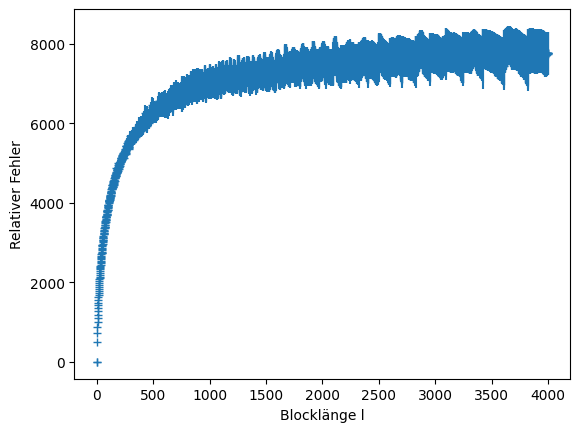

In [61]:
wo =9
x_1,y_1,y_err = data_blocking_error(spin_3d_60[1:,wo],4000)
plt.errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.xlabel(r"Blocklänge l")
plt.ylabel(r"Relativer Fehler")
plt.savefig("../Figure/Fehlerblocklängeneartc3dbeta")
plt.show()

nu = -0.381, Delta_nu = 0.035


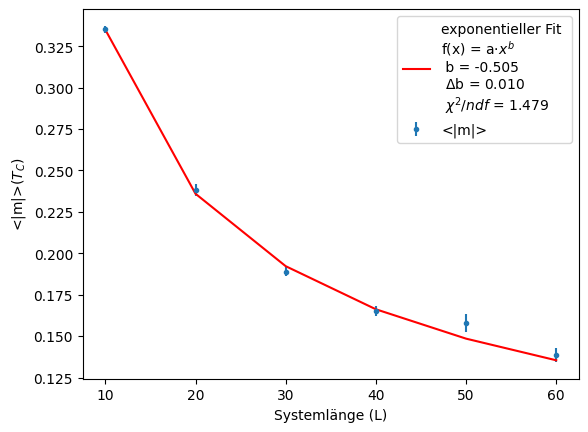

In [21]:
Boot_length = 2500
Block_Length = 800
x_data = 1/spin_3d_60[0,:]
indx = (x_data>4.51)&(x_data<=4.513)
new_x = x_data[indx]
system_length = np.linspace(10,60,6)
Magnetization_L10,Magnetization_L10_err = bootstrap_mean_and_error(spin_3d_10[1:,indx]/10**3,Block_Length,boot_length=length)
Magnetization_L20,Magnetization_L20_err = bootstrap_mean_and_error(spin_3d_20[1:,indx]/20**3,Block_Length,boot_length=length)
Magnetization_L30,Magnetization_L30_err = bootstrap_mean_and_error(spin_3d_30[1:,indx]/30**3,Block_Length,boot_length=length)
Magnetization_L40,Magnetization_L40_err = bootstrap_mean_and_error(spin_3d_40[1:,indx]/40**3,Block_Length,boot_length=length)
Magnetization_L50,Magnetization_L50_err = bootstrap_mean_and_error(spin_3d_50[1:,indx]/50**3,Block_Length,boot_length=length)
Magnetization_L60,Magnetization_L60_err = bootstrap_mean_and_error(spin_3d_60[1:,indx]/60**3,Block_Length,boot_length=length)
Magnetization_TC = np.array([Magnetization_L10 ,Magnetization_L20 ,Magnetization_L30 ,Magnetization_L40 ,Magnetization_L50 ,Magnetization_L60])
Magnetization_TC_err = np.array([Magnetization_L10_err ,Magnetization_L20_err ,Magnetization_L30_err ,Magnetization_L40_err ,Magnetization_L50_err ,Magnetization_L60_err])
plt.errorbar(system_length,Magnetization_TC,yerr=Magnetization_TC_err,fmt='.',label='<|m|>')

popt,pcov = curve_fit(exponential_fit,system_length,Magnetization_TC,sigma=Magnetization_TC_err)
chi= chi_sq(exponential_fit,system_length,Magnetization_TC,Magnetization_TC_err,popt)
b = popt[1]
delta_b = np.sqrt(pcov[1,1])
beta = b*nu
delta_beta = Kritische_fehler(b,delta_b,nu,delta_nu)
print(f'nu = {beta:.3f}, Delta_nu = {delta_beta:.3f}')
plt.plot(system_length,exponential_fit(system_length,*popt),'r',label=f'exponentieller Fit \nf(x) = a$\cdot x^b$ \n b = {popt[1]:.3f}\n $\Delta$b = {np.sqrt(pcov[1,1]):.3f} \n $\chi^2/ndf$ = {chi:.3f}')
plt.xlabel('Systemlänge (L)')
plt.ylabel(r'<|m|>($T_C$)')
plt.legend()
plt.savefig("../Figure/bestimmungvonbeta3d")
plt.show()

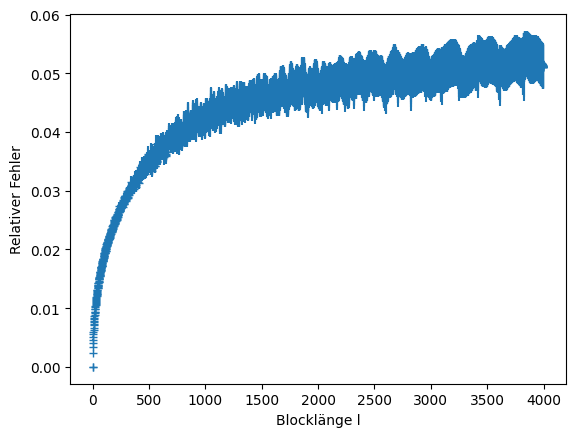

In [11]:
wo =8
x_1,y_1,y_err = data_blocking_error(spin_3d_60[1:,wo]/60**3,4000)
plt.errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.xlabel(r"Blocklänge l")
plt.ylabel(r"Relativer Fehler")
#plt.savefig("../Figure/Fehlerblocklängeneartc3d22")
plt.show()

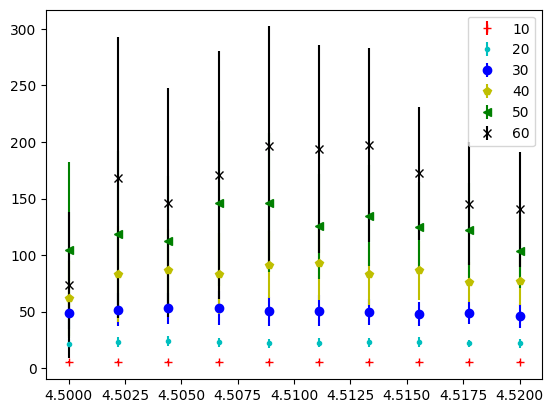

In [12]:
Block_Length = 1000
L1,L1_err =magnetic_sus_plot(spin_3d_10,block_len = Block_Length,color='r',format='+',boot_length=Boot_length,label='10',N=10**3)
L2,L2_err =magnetic_sus_plot(spin_3d_20,block_len = Block_Length,color='c',format='.',boot_length=Boot_length,label='20',N=20**3)
L3,L3_err =magnetic_sus_plot(spin_3d_30,block_len = Block_Length,color='b',format='o',boot_length=Boot_length,label='30',N=30**3)
L4,L4_err =magnetic_sus_plot(spin_3d_40,block_len = Block_Length,color='y',format='p',boot_length=Boot_length,label='40',N=40**3)
L5,L5_err =magnetic_sus_plot(spin_3d_50,block_len = Block_Length,color='g',format='<',boot_length=Boot_length,label='50',N=50**3)
L6,L6_err =magnetic_sus_plot(spin_3d_60,block_len = Block_Length,color='black',format='x',boot_length=Boot_length,label='60',N=60**3)
plt.legend()
plt.show()

NameError: name 'Kritische_fehler' is not defined

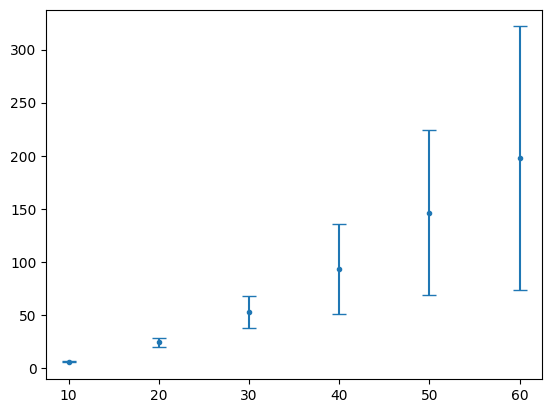

In [13]:
temp_array = np.array([max(L1),max(L2),max(L3),max(L4),max(L5),max(L6)])
temp_err =np.array([max(L1_err),max(L2_err),max(L3_err),max(L4_err),max(L5_err),max(L6_err)])
system_length = np.linspace(10,60,6)

plt.errorbar(system_length,temp_array,yerr=temp_err,fmt='.',capsize=5)
popt,pcov = curve_fit(exponential_fit,system_length,temp_array,sigma=temp_err)
chi= chi_sq(exponential_fit,system_length,temp_array,temp_err,popt)
b = popt[1]
delta_b = np.sqrt(pcov[1,1])
beta = b*nu
delta_beta = Kritische_fehler(b,delta_b,nu,delta_nu)
print(f'nu = {beta:.3f}, Delta_nu = {delta_beta:.3f}')

plt.plot(system_length,exponential_fit(system_length,*popt),'r',label=f'exponentieller Fit\nf(x) = a$\cdot x^b$ \nb = {b:.3f}\n$\Delta$b = {delta_b:.3f} \n$\chi^2/ndf$ = {chi:.3f}')
plt.xlabel('Systemlänge (L)')
plt.ylabel(r'$\chi$($T_C$)')
plt.legend()
#plt.savefig("../Figure/bestimmungvongamma3d")
plt.show()

In [40]:
specfic_10 = np.loadtxt("../data/energy_3dnochgenau10.txt").T
specfic_20 = np.loadtxt("../data/energy_3dnochgenau20.txt").T
specfic_30 = np.loadtxt("../data/energy_3dnochgenau30.txt").T
specfic_40 = np.loadtxt("../data/energy_3dnochgenau40.txt").T
specfic_50 = np.loadtxt("../data/energy_3dnochgenau50.txt").T
specfic_60 = np.loadtxt("../data/energy_3dnochgenau60.txt").T

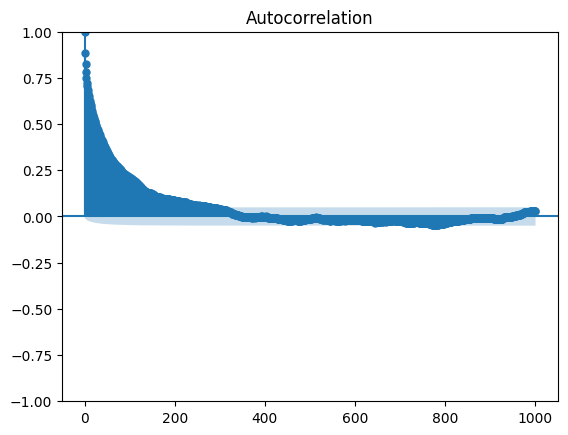

In [48]:
plot_acf(specfic_60[1:,wo],lags=1000)
plt.show()

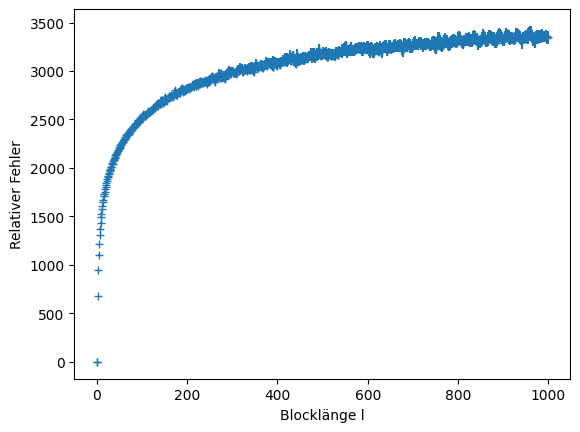

In [49]:
wo =9
x_1,y_1,y_err = data_blocking_error(specfic_60[1:,wo],1000)
plt.errorbar(x_1,y_1,yerr=y_err,fmt= '+',barsabove=True)
plt.xlabel(r"Blocklänge l")
plt.ylabel(r"Relativer Fehler")
plt.savefig("../Figure/Fehlerblocklängeneartc3denergy")
plt.show()

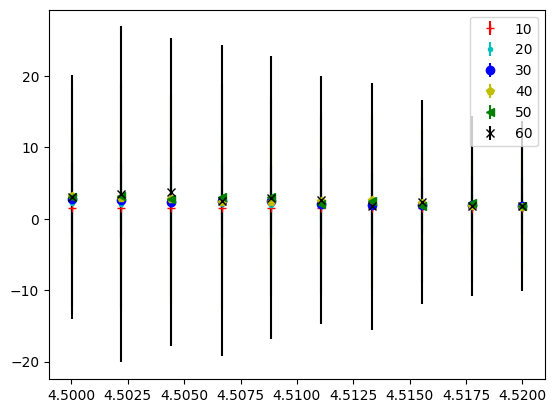

In [50]:
Boot_length = 2500
Block_Length = 200
L1,L1_err = specfic_heat_plot(specfic_10,block_len = Block_Length,color='r',format='+',boot_length=Boot_length,label='10',N=10**3)
L2,L2_err = specfic_heat_plot(specfic_20,block_len = Block_Length,color='c',format='.',boot_length=Boot_length,label='20',N=20**3)
L3,L3_err = specfic_heat_plot(specfic_30,block_len = Block_Length,color='b',format='o',boot_length=Boot_length,label='30',N=30**3)
L4,L4_err = specfic_heat_plot(specfic_40,block_len = Block_Length,color='y',format='p',boot_length=Boot_length,label='40',N=40**3)
L5,L5_err = specfic_heat_plot(specfic_50,block_len = Block_Length,color='g',format='<',boot_length=Boot_length,label='50',N=50**3)
L6,L6_err = specfic_heat_plot(specfic_60,block_len = Block_Length,color='black',format='x',boot_length=Boot_length,label='60',N=60**3)
plt.legend()
plt.show()


nu = 0.364, Delta_nu = 0.035


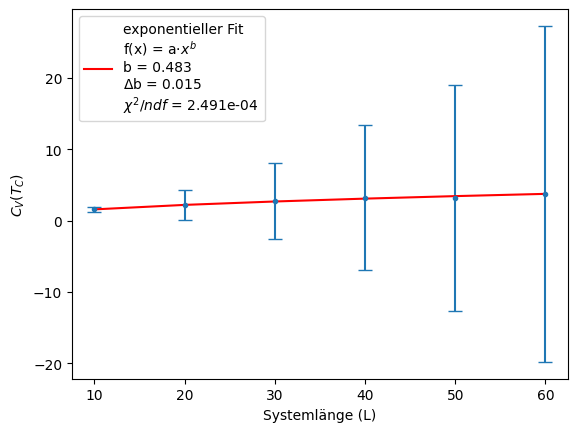

In [51]:
temp_array = np.array([max(L1),max(L2),max(L3),max(L4),max(L5),max(L6)])
temp_err =np.array([max(L1_err),max(L2_err),max(L3_err),max(L4_err),max(L5_err),max(L6_err)])
system_length = np.linspace(10,60,6)

plt.errorbar(system_length,temp_array,yerr=temp_err,fmt='.',capsize=5)
popt,pcov = curve_fit(exponential_fit,system_length,temp_array,sigma=temp_err)
chi= chi_sq(exponential_fit,system_length,temp_array,temp_err,popt)
b = popt[1]
delta_b = np.sqrt(pcov[1,1])
beta = b*nu
delta_beta = Kritische_fehler(b,delta_b,nu,delta_nu)
print(f'nu = {beta:.3f}, Delta_nu = {delta_beta:.3f}')

plt.plot(system_length,exponential_fit(system_length,*popt),'r',label=f'exponentieller Fit\nf(x) = a$\cdot x^b$ \nb = {b:.3f}\n$\Delta$b = {delta_b:.3f} \n$\chi^2/ndf$ = {chi:.3e}')
plt.xlabel('Systemlänge (L)')
plt.ylabel(r'$C_V$($T_C$)')
plt.legend()
plt.savefig("../Figure/bestimmungvonalpha3d")
plt.show()

nu = 0.802, Delta_nu = 0.080


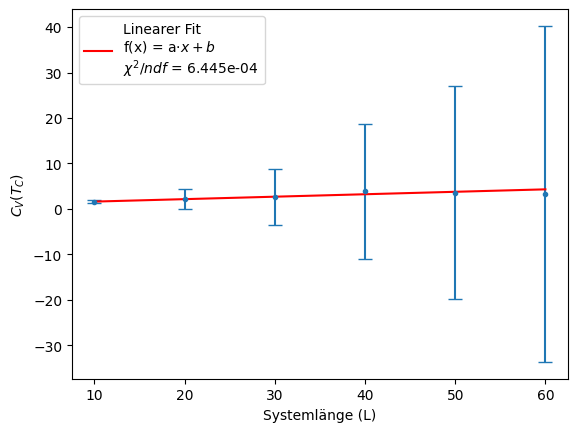

In [31]:
temp_array = np.array([max(L1),max(L2),max(L3),max(L4),max(L5),max(L6)])
temp_err =np.array([max(L1_err),max(L2_err),max(L3_err),max(L4_err),max(L5_err),max(L6_err)])
system_length = np.linspace(10,60,6)

plt.errorbar(system_length,temp_array,yerr=temp_err,fmt='.',capsize=5)

popt,pcov = curve_fit(linear_fit,system_length,temp_array,sigma=temp_err)
chi= chi_sq(linear_fit,system_length,temp_array,temp_err,popt)
b = popt[1]
delta_b = np.sqrt(pcov[1,1])
beta = b*nu
delta_beta = Kritische_fehler(b,delta_b,nu,delta_nu)
print(f'nu = {beta:.3f}, Delta_nu = {delta_beta:.3f}')

plt.plot(system_length,linear_fit(system_length,*popt),'r',label=f'Linearer Fit\nf(x) = a$\cdot x+b$ \n$\chi^2/ndf$ = {chi:.3e}')
plt.xlabel('Systemlänge (L)')
plt.ylabel(r'$C_V$($T_C$)')
plt.legend()
plt.savefig("../Figure/bestimmungvonalpha3dlinear")
plt.show()

nu = 0.431, Delta_nu = 0.148


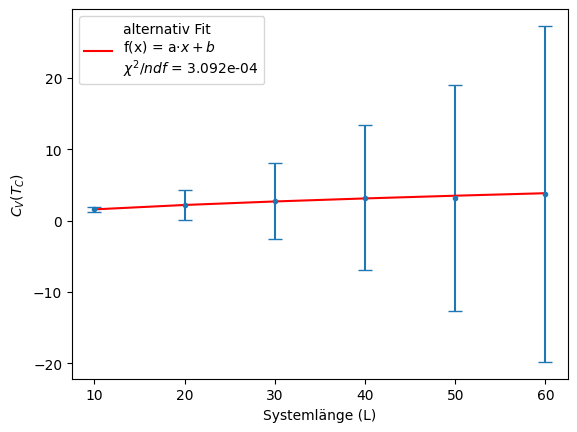

In [52]:
temp_array = np.array([max(L1),max(L2),max(L3),max(L4),max(L5),max(L6)])
temp_err =np.array([max(L1_err),max(L2_err),max(L3_err),max(L4_err),max(L5_err),max(L6_err)])
system_length = np.linspace(10,60,6)

plt.errorbar(system_length,temp_array,yerr=temp_err,fmt='.',capsize=5)

def alternativ(x,a,b,c):
    return a*x**b +c
popt,pcov = curve_fit(alternativ,system_length,temp_array,sigma=temp_err)
chi= chi_sq(alternativ,system_length,temp_array,temp_err,popt)
b = popt[1]
delta_b = np.sqrt(pcov[1,1])
beta = b*nu
delta_beta = Kritische_fehler(b,delta_b,nu,delta_nu)
print(f'nu = {beta:.3f}, Delta_nu = {delta_beta:.3f}')

plt.plot(system_length,alternativ(system_length,*popt),'r',label=f'alternativ Fit\nf(x) = a$\cdot x+b$ \n$\chi^2/ndf$ = {chi:.3e}')
plt.xlabel('Systemlänge (L)')
plt.ylabel(r'$C_V$($T_C$)')
plt.legend()
#plt.savefig("../Figure/bestimmungvonalpha3daternatic")
plt.show()

In [48]:
data = np.loadtxt("../data/homogenious10000.txt")
from matplotlib import patches

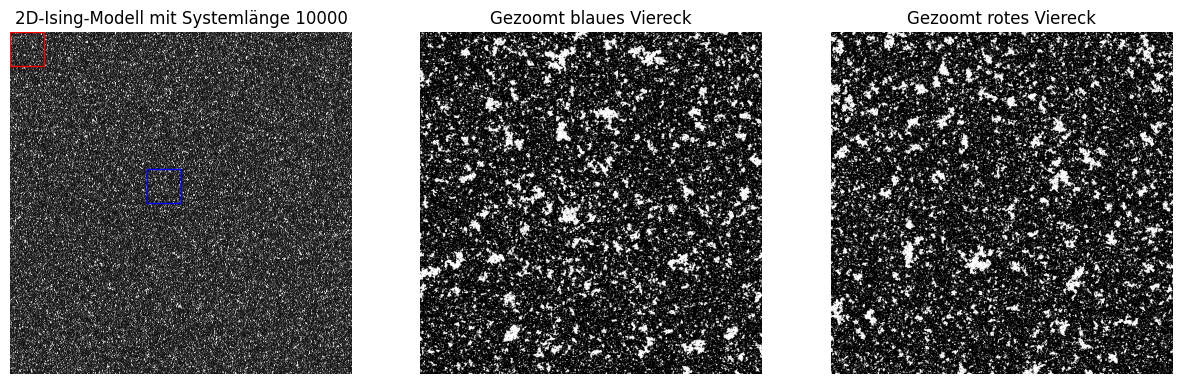

In [50]:

fig, ax = plt.subplots(1,3,figsize=(15,10))
ax[0].imshow(data,cmap='Greys')
ints =  patches.Rectangle((0,0), 1000, 1000,linewidth=1, edgecolor='r', facecolor='none')
ints2 =  patches.Rectangle((4000,4000), 1000, 1000,linewidth=1, edgecolor='b', facecolor='none')
ax[0].add_patch(ints)
ax[0].add_patch(ints2)
ax[1].imshow(data[4000:5000,4000:5000],cmap='Greys')
ax[2].imshow(data[:1000,:1000],cmap='Greys')
ax[0].set_title('2D-Ising-Modell mit Systemlänge 10000')
ax[2].set_title('Gezoomt rotes Viereck')
ax[1].set_title('Gezoomt blaues Viereck')
ax[0].axis('Off')
ax[1].axis('Off')
ax[2].axis('Off')
plt.savefig("../Figure/Universal")
plt.show()